In this lab, we will working on analysing a knowledge graph. We will also be implementing 2 different message passing algorithm.

We will load the opendialkg_triples.txt file. Each line of the file contains the (subject, predicte, object) separated by "\t". We will begin with loading the file and constructing the knowledge graph using networkx python library.

We will begin with installing the required dependencies.

In [ ]:
!pip3 install networkx
!pip3 install numpy

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
# We will begin with constructing the networkx graph

# Read the triples file

import networkx as nx

G = nx.DiGraph()

edges = []
edge_predicates = []
for line in open("/content/gdrive/MyDrive/opendialkg_triples.txt", "r"):
  line = line[:-1].split("\t")
  subject, predicate, object = line[0], line[1], line[2]
  edges.append((subject, object))
  edge_predicates.append(predicate)

G.add_edges_from(edges)


In [ ]:
print(len(edges))
print(len(set(edges)))
print(len(edge_predicates))

1190658
1093796
1190658


In [ ]:
# We now have to add the predicate information to the edges in G. Complete the following function which should add the required edge predicates to the respective edges.

def AddPredicatesToEdges(G, edge_predicates, edges):
  i = 0
  G1 = nx.DiGraph()
  for (subject, object) in edges:
    G1.add_edge(subject, object, predicate=edge_predicates[i])
    i+=1
  return G1

G = AddPredicatesToEdges(G, edge_predicates, edges)


In [ ]:
print(list(G.edges())[:10])
print(list(G1.edges(data=True))[:10])
print(len(G.edges())==len(G1.edges()))

[('September 11 attacks', 'The Pentagon'), ('September 11 attacks', 'Shanksville'), ('September 11 attacks', 'Arlington County'), ('September 11 attacks', 'Manhattan'), ('September 11 attacks', 'New York City'), ('September 11 attacks', 'United 93'), ('September 11 attacks', 'Reign Over Me'), ('September 11 attacks', 'Loose Change'), ('September 11 attacks', 'Falling Man'), ('September 11 attacks', "The Emperor's Children")]
[('September 11 attacks', 'The Pentagon', {'predicate': '~Damaged by disaster'}), ('September 11 attacks', 'Shanksville', {'predicate': 'Location(s)'}), ('September 11 attacks', 'Arlington County', {'predicate': 'Location(s)'}), ('September 11 attacks', 'Manhattan', {'predicate': 'Location(s)'}), ('September 11 attacks', 'New York City', {'predicate': 'Location(s)'}), ('September 11 attacks', 'United 93', {'predicate': '~Subject'}), ('September 11 attacks', 'Reign Over Me', {'predicate': '~Subject'}), ('September 11 attacks', 'Loose Change', {'predicate': '~Subject

# Complete the following:
1. Plot the distribution of the number of outgoing edges of a node.
2. Plot the distribution of the number of incoming edges of a node.
3. Find the top-10 nodes with the highest number of incoming and outgoing edges.
4. Run Pagerank algorithm over G and list the top-10 nodes according to the pagerank scores.


In [ ]:
# As you have read that Knowledge Graphs are generally incomplete. This means that some of the entities in the graph will have a high number of neighbors, while some may have few neighbors. 
# Nodes with high number of neighbors tend to be dense in factual information, while there is very limited information about nodes with a few neighbors.
# In the following two exercises, we will plot a distribution of the number of outgoing and incoming edges of nodes in the graph.

# To do the first exercise, you will need to compute the number of outgoing edges of every node in the graph.
# Following this, you would need to compute the binned histogram of the number of nodes of the graph.
# Complete the following function to display the plot.

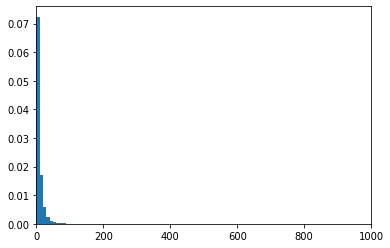

In [ ]:
import matplotlib.pyplot as plt

def PlotOutgoingEdgesDistribution(G):
  numberOfOutGoingEdges = []
  for node in G.nodes():
    # 1. Get the list of all the outgoing edges of the node in the graph.
    outgoingEdges = G.out_edges(node)
    numOutgoingEdges = len(outgoingEdges)
    # 2. Find the number of outgoing edges of the node in the graph
    if (numOutgoingEdges)>1000:
      continue
    # numOutgoingEdges = len(outgoingEdges)
    numberOfOutGoingEdges.append(numOutgoingEdges)

  # We will plot the distribution of the number of outgoing edges of nodes in the graph.
  # Use matplotlib to plot a histogram of the distribution and set the number of bins to 100.

  # Replace this commented line with the code of plotting the histrogram.
  plt.hist(numberOfOutGoingEdges, density=True, bins=100)
  plt.xlim(0, 1000)
  plt.show()
  return None
  
PlotOutgoingEdgesDistribution(G)



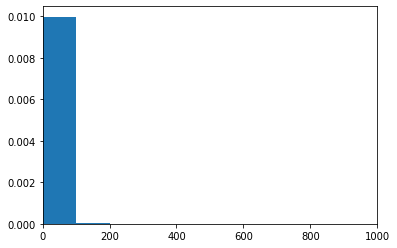

In [ ]:
# Similarly Complete the following function to plot the distribution of the number of incoming edges of nodes in the graph.
def PlotIncomingEdgesDistribution(G):
  numberOfOutGoingEdges = []
  for node in G.nodes():
    # 1. Get the list of all the outgoing edges of the node in the graph.
    outgoingEdges = G.in_edges(node)
    numOutgoingEdges = len(outgoingEdges)
    # 2. Find the number of outgoing edges of the node in the graph
    if (numOutgoingEdges)>1000:
      continue
    # numOutgoingEdges = len(outgoingEdges)
    numberOfOutGoingEdges.append(numOutgoingEdges)

  # We will plot the distribution of the number of outgoing edges of nodes in the graph.
  # Use matplotlib to plot a histogram of the distribution and set the number of bins to 100.

  # Replace this commented line with the code of plotting the histrogram.
  plt.hist(numberOfOutGoingEdges, density=True, bins=10)
  plt.xlim(0, 1000)
  plt.show()
  return None
  
PlotIncomingEdgesDistribution(G)

In [ ]:
# Once you have plotted the number of nodes in the graph, we would want to identify the most important nodes in the graph.
# 1. Compute the set of top-10 nodes with the highest number of outgoing edegs.
# 2. Compute the set of top-10 nodes with the highest number of incoming edges.
# 3. Display both the sets.
# 4. Compute the set of nodes that belong to both the sets.

In [ ]:
def TopKOutdegree(G, k=10):
  node_od = []
  for node in G.nodes():
    outDegree = G.out_degree(node)
    node_od.append((node, outDegree))
  node_od = sorted(node_od, key=lambda element:element[1], reverse=True)
  print(node_od[:k])

TopKOutdegree(G, 10)

[('United States of America', 21075), ('Male', 16656), ('English', 12239), ('English Language', 7856), ('Author', 7838), ('Actor', 7779), ('Writer', 7018), ('Northern Hemisphere', 5276), ('Artist', 5097), ('Female', 4787)]


In [ ]:
def TopKIndegree(G, k=10):
  node_od = []
  for node in G.nodes():
    outDegree = G.in_degree(node)
    node_od.append((node, outDegree))
  node_od = sorted(node_od, key=lambda element:element[1], reverse=True)
  print(node_od[:k])

TopKIndegree(G, 10)

[('United States of America', 21075), ('Male', 16656), ('English', 12239), ('English Language', 7856), ('Author', 7838), ('Actor', 7779), ('Writer', 7018), ('Northern Hemisphere', 5276), ('Artist', 5097), ('Female', 4787)]


In [ ]:
# We will now try to identify the most important nodes in the graph according to the PageRank algorithm
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
def ImportantNodesPageRank(G):
  # Compute the pagerank values of the nodes in the graph using the pagerank algorithm impleted in networkx.
  pagerankScores = pagerank(G, alpha=0.25)
  pagerankScores = list(pagerankScores.items())
  node_pagerank = sorted(pagerankScores, key=lambda element:element[1], reverse=True)
  # Find and display the top-10 nodes with the highest pagerank scores.
  print(node_pagerank[:10])
  return None
ImportantNodesPageRank(G)

[('English', 0.004538434994418519), ('United States of America', 0.004040890936810153), ('London', 0.00384279107860357), ('Male', 0.0038032047622298974), ('Brooklyn', 0.002459028725268893), ('Author', 0.0016988328942617239), ('Philadelphia', 0.0014193126401622041), ('Actor', 0.0014033259933570912), ('English Language', 0.0013635975937272362), ('Writer', 0.0013561289980928348)]


Graph Convolutional Network in vector form is given as :

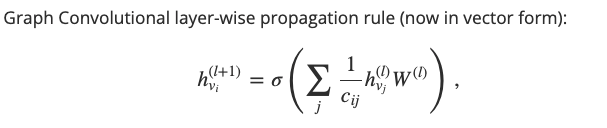

We will be implementing GCN using NetworkX and Numpy.

In [ ]:
# 1. Define a graph with the the following edges: (0, 1), (1, 2), (1, 3), (3, 4), (4, 2), (4, 0)
# 2. Define the vector embeddings for the nodes in the graph.
# 3. Define and implement the GCN layer.
# 4. Update the embedding of the node after applying the GCN layer to the graph.

In [ ]:
# 1. Define a graph with the the following edges: (0, 1), (1, 2), (1, 3), (3, 4), (4, 2), (4, 0)
# Create an Adjacency matrix to display the above graph.

from networkx.convert_matrix import to_numpy_matrix
G = nx.DiGraph()
edges = [(0, 1), (1, 2), (1, 3), (3, 4), (4, 2), (4, 0)]

G.add_edges_from(edges)
adjMatrix = to_numpy_matrix(G)

In [ ]:
# 2. We will initialise each node with a random vector of size 

import numpy as np

nodeEmb = np.random.rand(len(G.nodes()), 20)

In [ ]:
# We will implemennt one layer of GCN. The GCN layer will be a class with the weight matrix as a property of the class.
#  We will assume that the sigma function is Identity in our case and c_ij is a constant.
class GCNLayer():
  def __init__(self, G, dim, c):
    self.W = np.random.rand(dim, dim)
    self.dim = dim
    self.c = c
  
  def forward(self, G, nodeEmb):
    # Do something
    for node in G.nodes():
      # Do Something
      for neighbor in G.in_edges(node):
        # Do Something
      
    return updated_embeddings
